# 04. 합성곱 신경망 (CNN)
## 01. 합성곱 신경망
데이터가 가진 특징들의 패턴을 학습하는 알고리즘

### 1-1. 이미지 표현
- 화소를 나타내는 숫자는 이미지의 강도를 나타내고 숫자가 클수록 더 강한 특성
- 컬러 이미지는 빨강, 초록, 파랑 채널로 구성된 3장의 이미지를 겹쳐서 표현

### 1-2. 합성곱 (Convolution)
- 합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여 이미지에 대한 특성을 추출하는 방법
- 특성맵 : 합성곱 연산을 통해서 추출된 이미지

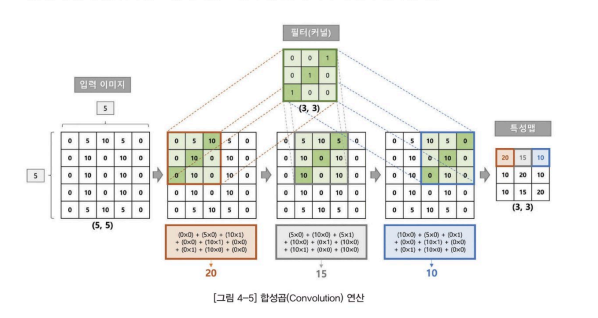

### 1-3. 채널(Channel)
입력 이미지를 구성하는 2차원 배열의 개수

- 입력 이미지의 채널 개수만큼 커널 생성, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행
- 입력 이미지의 채널 개수만큼 합성곱 연산 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해줌

### 1-4. 스트라이드(Stride)
합성곱 연산 시 이동하는 간격

### 1-5. 패딩(Padding)
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정
- 일반적으로 그림과 같은 zero-padding을 사용
- 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출

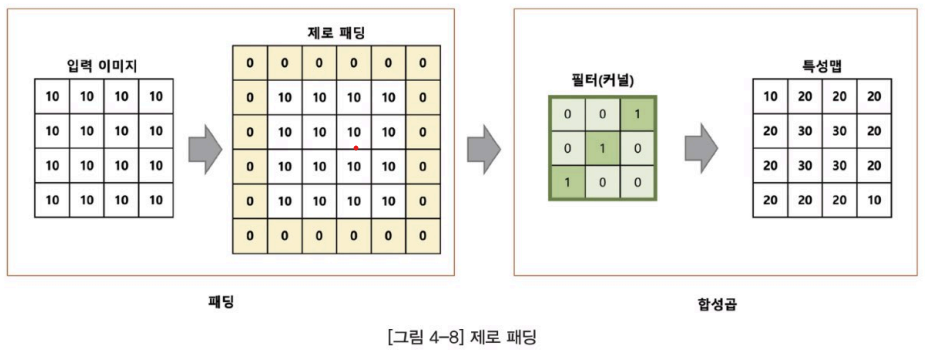

- padding = 'same'으로 설정하면 zero-padding을 적용
- 기본값은 padding = 'valid'

### 1-6. 특성맵(feature map)사이즈
패딩과 스프라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식

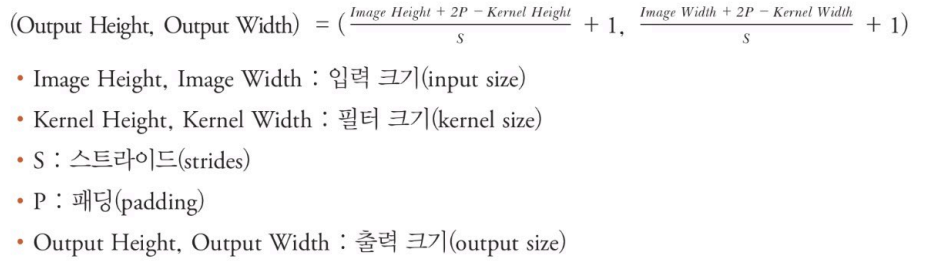

### 1-7. 풀링(pooling)
- 풀링 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 이미지 축소를 통해 연산량을 감소
- 과대적합 방지
- 최대 풀링(max pooling) : 특징의 값이 큰 값이 다른 특징들을 대표

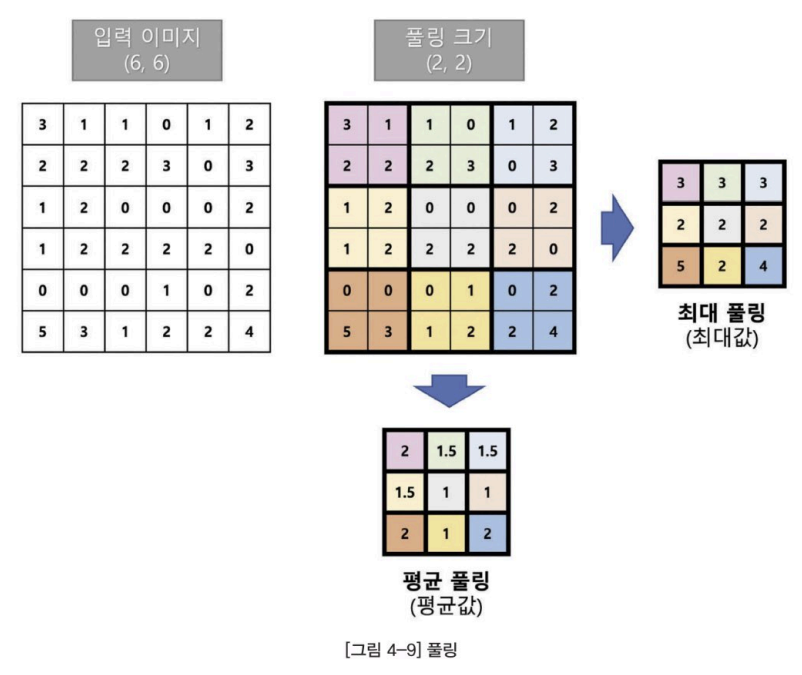

## 02. 간단한 모델 생성
### 2-1. 데이터 로드 및 전처리


In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


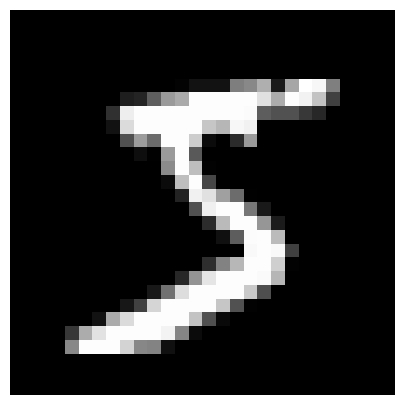

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
# 훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최솟값, 최댓값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지
# CNN 모델에 주입하기 위해 색상을 나타내는 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2. Sequential API로 모델 생성 및 학습
- 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 만듦
- 최종 분류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 만듦
- 합성곱은 Conv2D 레리러를 사용하고 (3,3) 크기의 서로 다른 32가지 종류의 커널을 적용
- ReLU 활성화 함수를 적용
- 풀링 레이어는 (2,2) 크기로 최대 풀링을 적용
- 노드 개수를 10으로 하고 다중 분류 문제이므로 활성화 함수로 softmax 적용

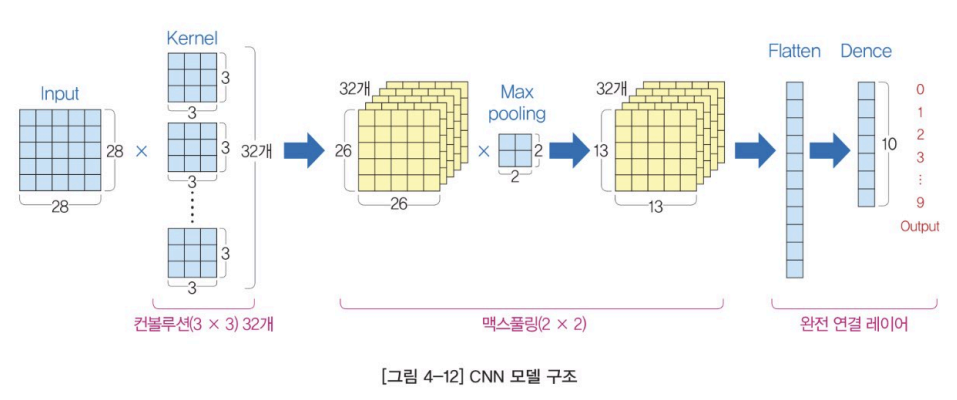

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2210 - accuracy: 0.9363 - val_loss: 0.0946 - val_accuracy: 0.9710
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0842 - accuracy: 0.9756 - val_loss: 0.0611 - val_accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0621 - accuracy: 0.9815 - val_loss: 0.0590 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.0579 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0527 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0570 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 4s 12ms/step - loss: 0.0540 - accuracy: 0.9847


[0.054025471210479736, 0.9847000241279602]

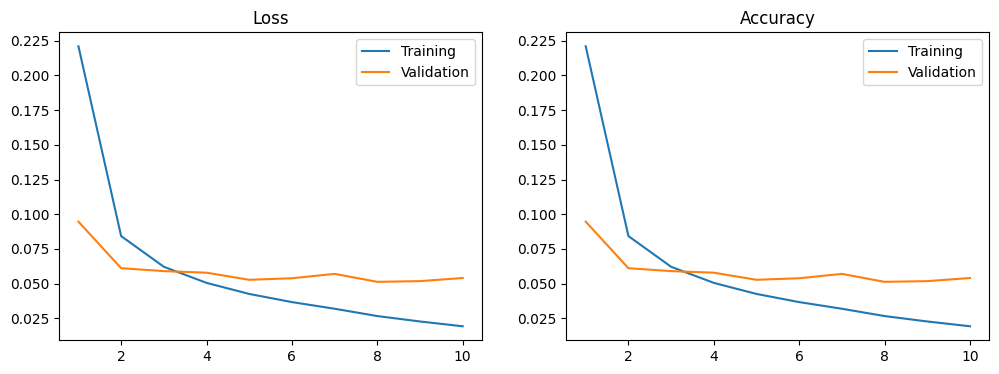

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3. 모델 구조 파악
- 모델 인스턴스에 summary() 메소드를 적용해주면 모델의 구조를 요약해서 보여줌
- 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터(가중치) 개수를 알 수 있음

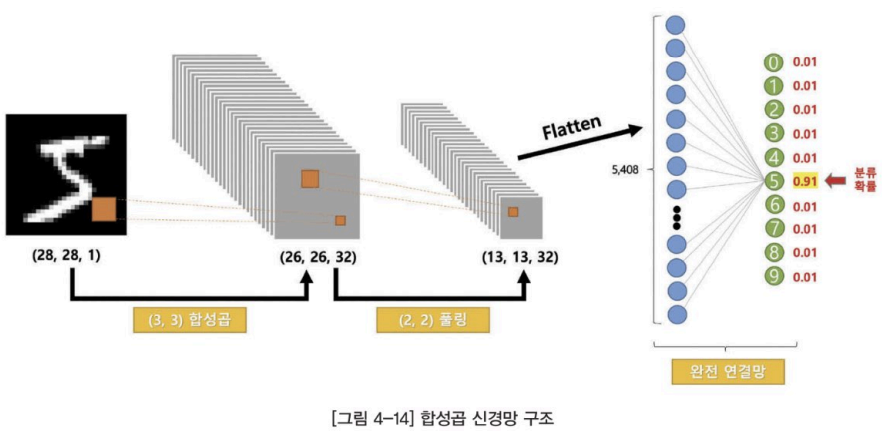

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
# 레이어
model.layers

In [15]:
# 첫 번째 레이어 선택
model.layers[0]

In [16]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.81526440e-01, -9.78023469e-01,  1.90243766e-01,
           -2.79591769e-01, -5.43131649e-01, -5.54370731e-02,
           -1.07544088e+00, -9.02052701e-01, -7.57266760e-01,
            1.67693645e-01, -1.34514486e-02,  2.50624508e-01,
           -1.19394433e+00, -1.45628124e-01,  3.71550679e-01,
            3.54307204e-01, -5.62995933e-02,  5.29633284e-01,
           -9.86271501e-01,  1.35888755e-01, -7.46417642e-02,
            2.16136828e-01, -7.83845559e-02, -5.81510663e-01,
            3.19362283e-01,  3.26050937e-01, -8.39443505e-02,
           -4.63475019e-01,  5.70660569e-02,  2.28401050e-01,
            1.25764549e-01,  4.75924648e-02]],
 
         [[-2.53262460e-01, -4.46953237e-01,  5.37694037e-01,
            1.39189228e-01, -9.09521282e-01, -3.99831921e-01,
           -6.15239203e-01, -2.20661648e-02,  1.64928392e-01,
            3.33189040e-01, -5.54969832e-02,  3.69597346e-01,
           

- 커널 가중치의 shape이 (3, 3, 1, 32)
- (3, 3) = 필터의 크기
- (1) = 입력층의 채널 개수
- (32) = 출력층의 채널 개수
  - 따라서 layer[0] 커널의 학습(업데이트) 가능한 파라미터의 수는 3 x 3 x 1 x 32 = 288개
  - 상수항(bias) 가중치의 shape은 (32,)이고, 이는 출력층의 채널 수를 말함
  - layer[0]의 총 학습 가능한 파라미터 수는 커널과 상수항을 더해서 288 + 32 = 320개

In [19]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.81526440e-01, -9.78023469e-01,  1.90243766e-01,
          -2.79591769e-01, -5.43131649e-01, -5.54370731e-02,
          -1.07544088e+00, -9.02052701e-01, -7.57266760e-01,
           1.67693645e-01, -1.34514486e-02,  2.50624508e-01,
          -1.19394433e+00, -1.45628124e-01,  3.71550679e-01,
           3.54307204e-01, -5.62995933e-02,  5.29633284e-01,
          -9.86271501e-01,  1.35888755e-01, -7.46417642e-02,
           2.16136828e-01, -7.83845559e-02, -5.81510663e-01,
           3.19362283e-01,  3.26050937e-01, -8.39443505e-02,
          -4.63475019e-01,  5.70660569e-02,  2.28401050e-01,
           1.25764549e-01,  4.75924648e-02]],

        [[-2.53262460e-01, -4.46953237e-01,  5.37694037e-01,
           1.39189228e-01, -9.09521282e-01, -3.99831921e-01,
          -6.15239203e-01, -2.20661648e-02,  1.64928392e-01,
           3.33189040e-01, -5.54969832e-02,  3.69597346e-01,
          -2.38717988e-01,  

In [20]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.22111155, -0.14644141, -0.01847921, -0.05730725, -0.02367387,
       -0.02264787, -0.06570081,  0.00362452, -0.01595004, -0.15585546,
       -0.16888012, -0.37948218, -0.03653246, -0.24901778, -0.4133793 ,
       -0.35160422, -0.2573116 , -0.00403926,  0.0935159 , -0.23880064,
       -0.27145672, -0.15734418,  0.0092972 , -0.2612866 , -0.30837327,
       -0.40450937,  0.15951566, -0.21311207, -0.11343994, -0.35887733,
       -0.058009  , -0.1923848 ], dtype=float32)>

In [21]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 148ms/step


2

In [23]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

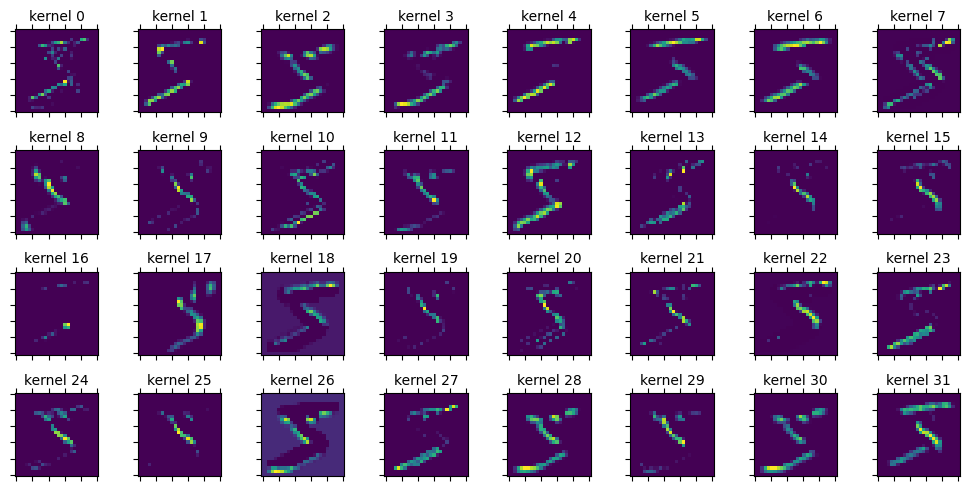

In [24]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [25]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


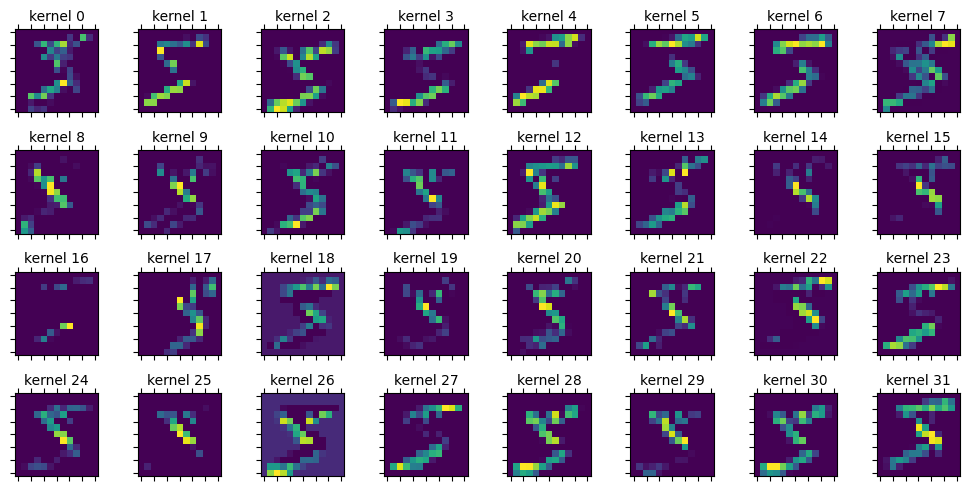

In [26]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 03. 복잡한 모델 생성
### 3-1. 데이터셋 준비

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_vaild) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


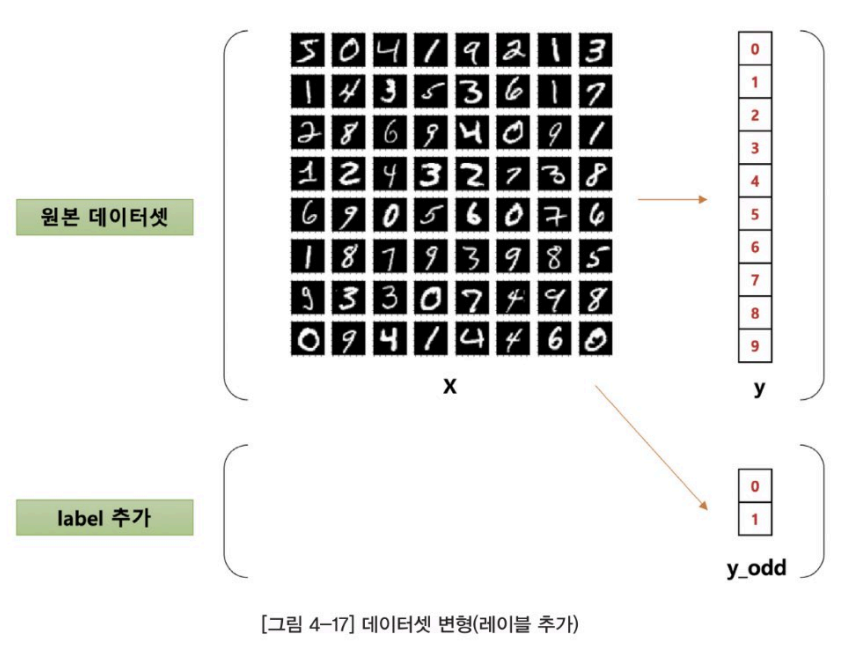

In [29]:
# 새로운 출력 값 배열 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
# 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
# 검증 데이터셋에 대해서도 홀수, 짝수를 나타내는 y_vaiid_odd 배열
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화(Noramalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2. Functional API로 다중 입력, 다중 출력 레이어 생성

In [33]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

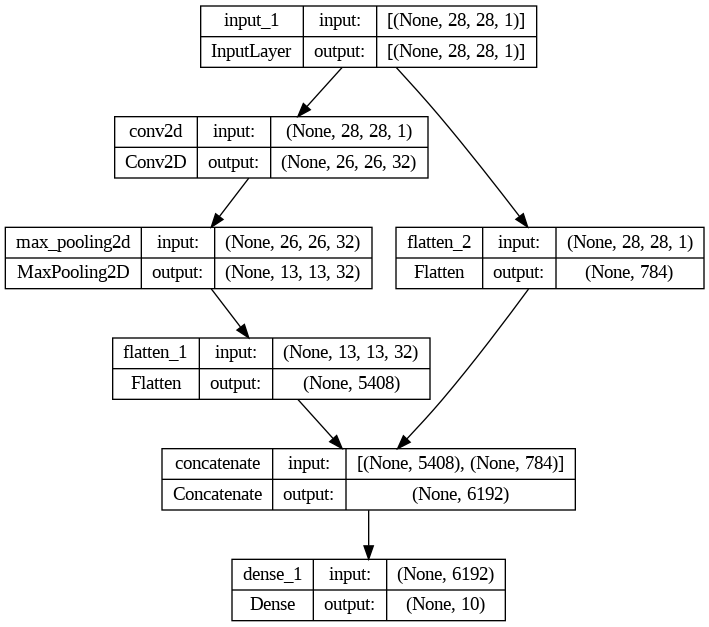

In [36]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2081 - accuracy: 0.9397 - val_loss: 0.0928 - val_accuracy: 0.9724
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0803 - accuracy: 0.9766 - val_loss: 0.0632 - val_accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0678 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0607 - val_accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0570 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0596 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0582 -

### 3-3. 다중 출력 분류 모델

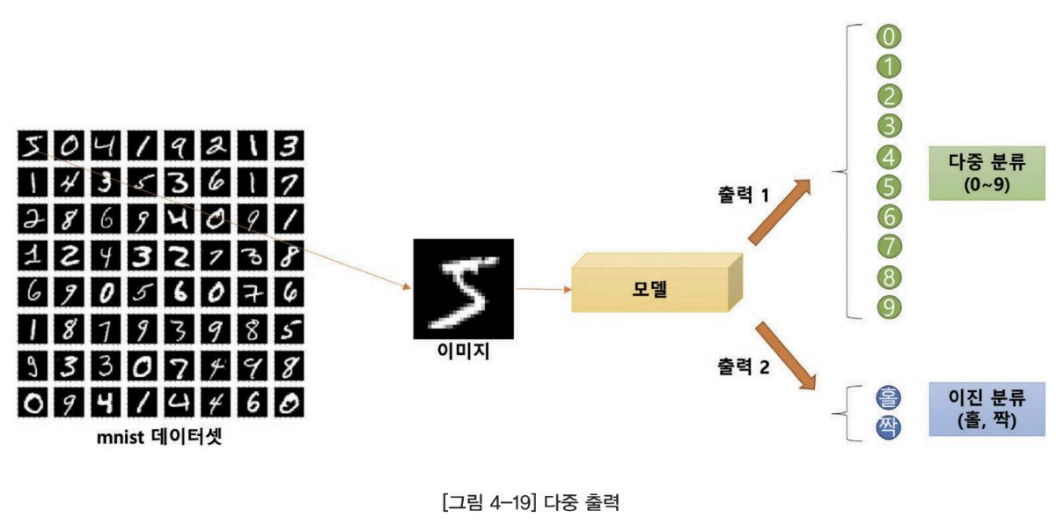

In [38]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


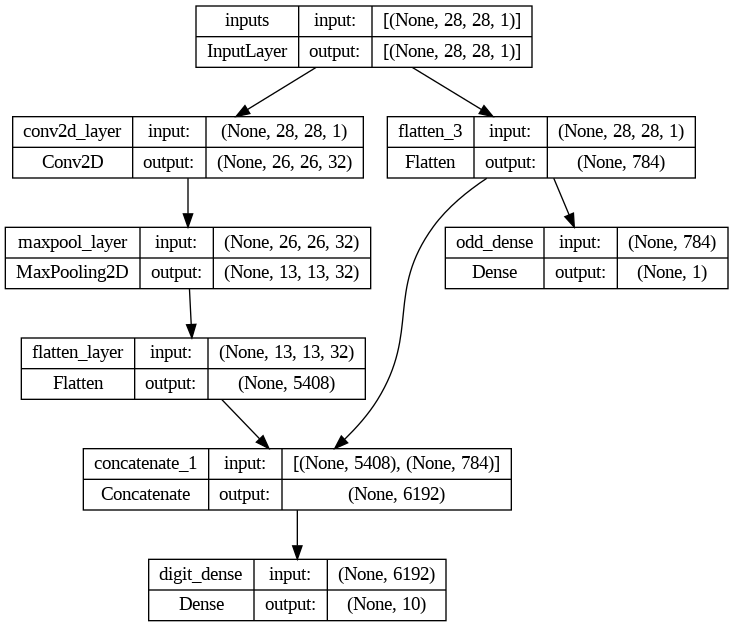

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [41]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=1)

1875/1875 [==============================] - 33s 17ms/step - loss: 0.3691 - digit_dense_loss: 0.2059 - odd_dense_loss: 0.3265 - digit_dense_accuracy: 0.9398 - odd_dense_accuracy: 0.8618 - val_loss: 0.2297 - val_digit_dense_loss: 0.0914 - val_odd_dense_loss: 0.2766 - val_digit_dense_accuracy: 0.9724 - val_odd_dense_accuracy: 0.8885


In [42]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 5ms/step - loss: 0.2297 - digit_dense_loss: 0.0914 - odd_dense_loss: 0.2766 - digit_dense_accuracy: 0.9724 - odd_dense_accuracy: 0.8885


[0.2297065258026123,
 0.09141658991575241,
 0.27657970786094666,
 0.9724000096321106,
 0.8884999752044678]

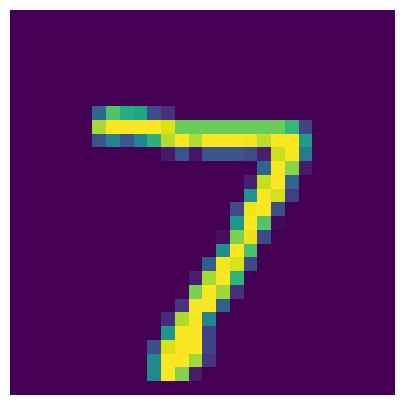

In [43]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [44]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])


313/313 [==============================] - 2s 5ms/step
[2.6753698e-06 7.2189877e-08 2.8330136e-05 3.9532618e-04 1.3937701e-07
 5.3482501e-07 3.1196495e-10 9.9934775e-01 9.6346753e-07 2.2431606e-04]
[0.9891122]


In [45]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [46]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-46-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4. 전이 학습(Transfer Learning)
이전에 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성

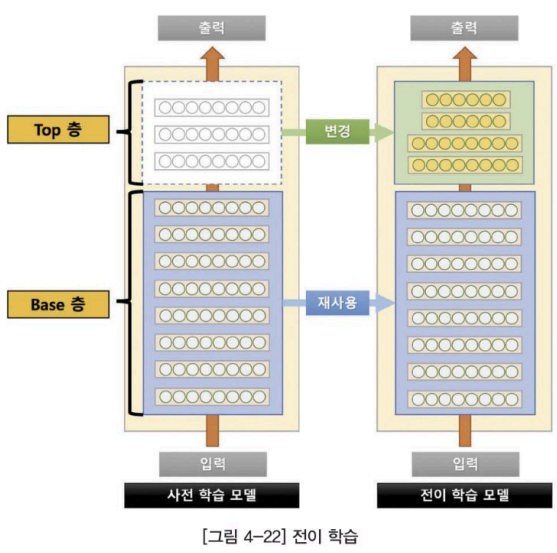

In [47]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


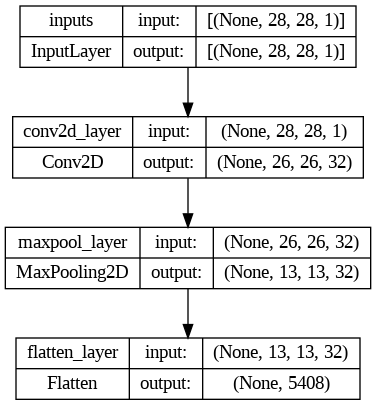

In [48]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [49]:
# Sequential API 적용

digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
    ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


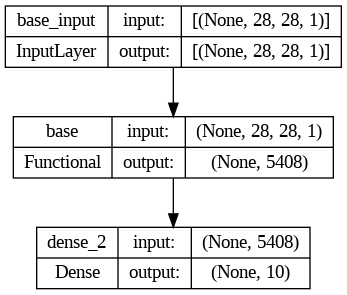

In [50]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [51]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1616 - accuracy: 0.9547 - val_loss: 0.0832 - val_accuracy: 0.9744
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0710 - accuracy: 0.9789 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0542 - accuracy: 0.9841 - val_loss: 0.0589 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0597 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0530 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0524 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0637 -

In [62]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [63]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [64]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1238 - accuracy: 0.9671 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0491 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0402 - accuracy: 0.9882 - val_loss: 0.0624 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.0567 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0563 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0523 - val_ac

In [65]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [66]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [67]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1244 - accuracy: 0.9659 - val_loss: 0.0648 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0399 - accuracy: 0.9882 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0545 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0529 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0622 - val_ac